In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [42]:
df = pd.read_csv('Data/data.csv', delimiter=';')

In [16]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [18]:
for column in df.columns:
    print(column)
    print('NaN: ', df[column].isna().sum())
    print('Null: ', df[column].isnull().sum())
    print('Dtype: ', df[column].dtypes)
    print('-'*20)

Marital status
NaN:  0
Null:  0
Dtype:  int64
--------------------
Application mode
NaN:  0
Null:  0
Dtype:  int64
--------------------
Application order
NaN:  0
Null:  0
Dtype:  int64
--------------------
Course
NaN:  0
Null:  0
Dtype:  int64
--------------------
Daytime/evening attendance	
NaN:  0
Null:  0
Dtype:  int64
--------------------
Previous qualification
NaN:  0
Null:  0
Dtype:  int64
--------------------
Previous qualification (grade)
NaN:  0
Null:  0
Dtype:  float64
--------------------
Nacionality
NaN:  0
Null:  0
Dtype:  int64
--------------------
Mother's qualification
NaN:  0
Null:  0
Dtype:  int64
--------------------
Father's qualification
NaN:  0
Null:  0
Dtype:  int64
--------------------
Mother's occupation
NaN:  0
Null:  0
Dtype:  int64
--------------------
Father's occupation
NaN:  0
Null:  0
Dtype:  int64
--------------------
Admission grade
NaN:  0
Null:  0
Dtype:  float64
--------------------
Displaced
NaN:  0
Null:  0
Dtype:  int64
--------------------
Educa

In [19]:
df_onehot_course = pd.get_dummies(df['Course'], prefix='Course').astype('int64')
print(df_onehot_course)
df = pd.concat([df, df_onehot_course], axis=1)
df = df.drop('Course', axis=1)

      Course_33  Course_171  Course_8014  Course_9003  Course_9070  \
0             0           1            0            0            0   
1             0           0            0            0            0   
2             0           0            0            0            1   
3             0           0            0            0            0   
4             0           0            1            0            0   
...         ...         ...          ...          ...          ...   
4419          0           0            0            0            0   
4420          0           0            0            0            0   
4421          0           0            0            0            0   
4422          0           0            0            0            0   
4423          0           0            0            0            0   

      Course_9085  Course_9119  Course_9130  Course_9147  Course_9238  \
0               0            0            0            0            0   
1            

In [21]:
def convert (target : str) -> int:
    if target == 'Graduate':
        return 1
    else:
        return 0

In [22]:
df_merge = df.copy()

In [23]:
df_merge['Target'] = df['Target'].apply(convert)

In [24]:
df_merge.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991
0,1,17,5,1,1,122.0,1,19,12,5,...,0,0,0,0,0,0,0,0,0,0
1,1,15,1,1,1,160.0,1,1,3,3,...,0,0,0,1,0,0,0,0,0,0
2,1,1,5,1,1,122.0,1,37,37,9,...,0,0,0,0,0,0,0,0,0,0
3,1,17,2,1,1,122.0,1,38,37,5,...,0,0,0,0,0,0,0,1,0,0
4,2,39,1,0,1,100.0,1,37,38,9,...,0,0,0,0,0,0,0,0,0,0


Normalizing data

In [25]:
continuous_columns = df_merge.select_dtypes(include=[np.float64]).columns
for cols in continuous_columns:
    df_merge[cols] = (df_merge[cols] - df_merge[cols].mean())/df_merge[cols].std()

In [26]:
df_merge.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991
0,1,17,5,1,1,-0.804750,1,19,12,5,...,0,0,0,0,0,0,0,0,0,0
1,1,15,1,1,1,2.076585,1,1,3,3,...,0,0,0,1,0,0,0,0,0,0
2,1,1,5,1,1,-0.804750,1,37,37,9,...,0,0,0,0,0,0,0,0,0,0
3,1,17,2,1,1,-0.804750,1,38,37,5,...,0,0,0,0,0,0,0,1,0,0
4,2,39,1,0,1,-2.472892,1,37,38,9,...,0,0,0,0,0,0,0,0,0,0


Fearture engineering

In [27]:
corr_matrix = df_merge[continuous_columns].corr()

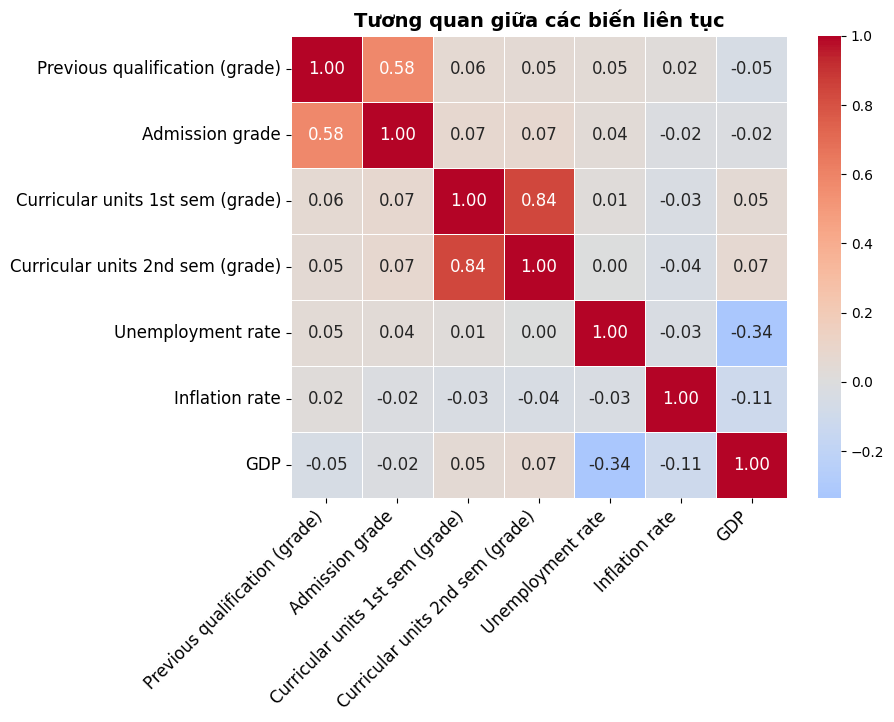

In [28]:
plt.figure(figsize=(8, 6))  # Kích thước hình
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f",  # Giới hạn 2 chữ số thập phân
    cmap="coolwarm",  # Chọn màu sắc dễ nhìn hơn
    center=0,  # Căn giữa màu sắc
    linewidths=0.5,  # Thêm đường viền giữa các ô
    annot_kws={"size": 12},  # Chỉnh kích thước chữ số trong ô
    xticklabels=continuous_columns, 
    yticklabels=continuous_columns
)

# Xoay nhãn 
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.title("Tương quan giữa các biến liên tục", fontsize=14, fontweight="bold")
plt.show()


Như ta thấy Curricular units 1st sem (grade) và Curricular units 2nd sem (grade) có hệ số tương quan cao (> 0.8) nên ta chọn 1 feature để loại, vì Curricular units 2nd sem (grade) có hệ số tương quan với các feature khác trong dataset nên ta sẽ loại feature này

In [29]:
df_filter = df_merge.drop(columns = 'Curricular units 2nd sem (grade)', axis = 1)
df_filter

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991
0,1,17,5,1,1,-0.804750,1,19,12,5,...,0,0,0,0,0,0,0,0,0,0
1,1,15,1,1,1,2.076585,1,1,3,3,...,0,0,0,1,0,0,0,0,0,0
2,1,1,5,1,1,-0.804750,1,37,37,9,...,0,0,0,0,0,0,0,0,0,0
3,1,17,2,1,1,-0.804750,1,38,37,5,...,0,0,0,0,0,0,0,1,0,0
4,2,39,1,0,1,-2.472892,1,37,38,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,-0.577276,1,1,1,5,...,0,0,0,0,0,0,0,1,0,0
4420,1,1,2,1,1,-0.956399,105,1,1,9,...,0,0,0,0,0,0,0,1,0,0
4421,1,1,1,1,1,1.621637,1,37,37,9,...,0,0,0,0,1,0,0,0,0,0
4422,1,1,1,1,1,3.593077,1,37,37,7,...,0,1,0,0,0,0,0,0,0,0


In [30]:
X = df_filter.drop(columns='Target')
X

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991
0,1,17,5,1,1,-0.804750,1,19,12,5,...,0,0,0,0,0,0,0,0,0,0
1,1,15,1,1,1,2.076585,1,1,3,3,...,0,0,0,1,0,0,0,0,0,0
2,1,1,5,1,1,-0.804750,1,37,37,9,...,0,0,0,0,0,0,0,0,0,0
3,1,17,2,1,1,-0.804750,1,38,37,5,...,0,0,0,0,0,0,0,1,0,0
4,2,39,1,0,1,-2.472892,1,37,38,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,-0.577276,1,1,1,5,...,0,0,0,0,0,0,0,1,0,0
4420,1,1,2,1,1,-0.956399,105,1,1,9,...,0,0,0,0,0,0,0,1,0,0
4421,1,1,1,1,1,1.621637,1,37,37,9,...,0,0,0,0,1,0,0,0,0,0
4422,1,1,1,1,1,3.593077,1,37,37,7,...,0,1,0,0,0,0,0,0,0,0


In [31]:
y = df_filter['Target']
y

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 4424, dtype: int64

In [43]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=24)

In [44]:
y_train = y_train.to_numpy().reshape(-1,1)

In [45]:
print(y_train.shape)

(3539, 1)


In [46]:
y_test = y_test.to_numpy().reshape(-1,1)

In [47]:
print(y_test.shape)

(885, 1)


In [48]:
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()

In [49]:
class LogisticRegressionNumpy:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.lr = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.bias = None
        self.loss_history = []
    
    # Hàm sigmoid
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Hàm loss
    def compute_loss(self, y, y_pred):
        m = len(y)
        return -(1/m) * np.sum(y * np.log(y_pred + 1e-6) + (1 - y) * np.log(1 - y_pred + 1e-6))
    
    # Bắt đầu train
    def fit(self, X, y):
        m = X.shape[0]
        n  = X.shape[1]
        self.theta = np.zeros((n,1))
        self.bias = 0
        
        # Gradient Descent 
        for i in range(self.num_iterations):
            z = np.dot(X, self.theta) + self.bias
            y_pred = self.sigmoid(z)
            
            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)
            
            # Tính gradient rồi cập nhật trọng số
            dz = y_pred - y
            dw = (1/m) * np.dot(X.T, dz)
            db = (1/m) * np.sum(dz)

            # Cập nhật trọng số 
            self.theta -= self.lr * dw
            self.bias -= self.lr * db
    def predict(self, X):
        z = np.dot(X, self.theta) + self.bias
        y_pred = self.sigmoid(z)
        return (y_pred >= 0.5).astype(int)
    
    def accuracy(self, y, y_pred):
        return (1 - np.abs(y-y_pred)).mean()

In [50]:
log_reg = LogisticRegressionNumpy()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

acc = log_reg.accuracy(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.81


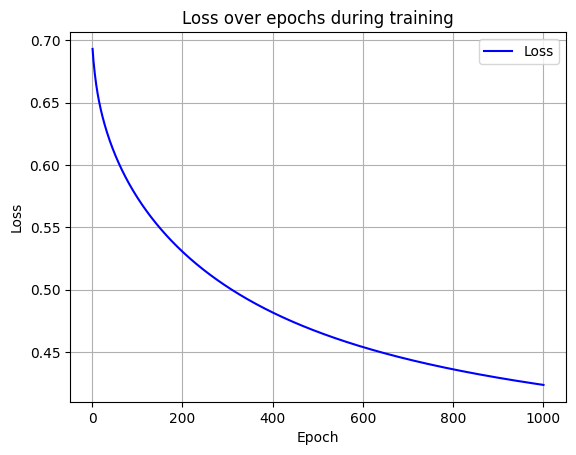

In [51]:
plt.plot(list(range(1, log_reg.num_iterations + 1)), log_reg.loss_history, color='blue', label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs during training')
plt.legend()
plt.grid()
plt.show()